##### 9. Consider the USArrests data. We will now perform hierarchical clustering on the states.

In [117]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from statsmodels.datasets import get_rdataset

In [118]:
df = get_rdataset('USArrests').data

##### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [119]:
hcluster = AgglomerativeClustering
hcluster(compute_full_tree=True, linkage='complete').fit(df)

AgglomerativeClustering(compute_full_tree=True, linkage='complete')

##### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

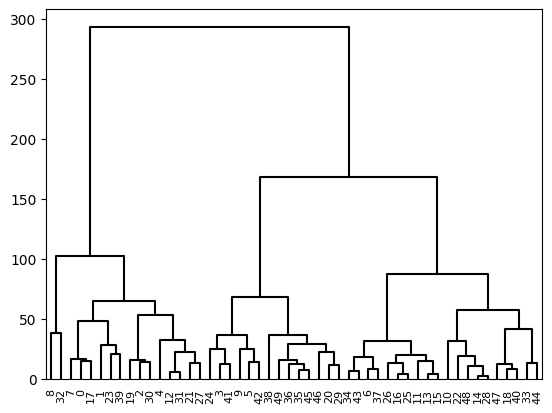

In [120]:
link = linkage(df, method='complete')
dendrogram(link, color_threshold=0, above_threshold_color='black');

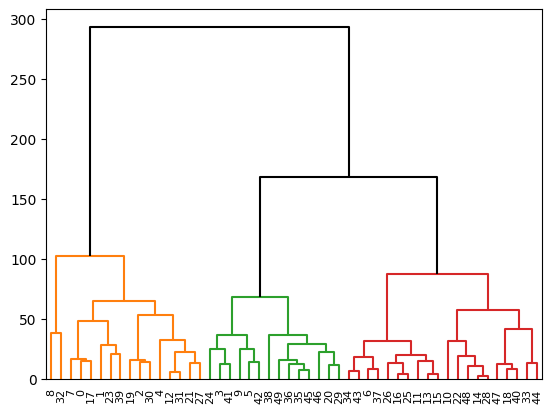

In [121]:
dendrogram(link, color_threshold=150, above_threshold_color='black');

In [122]:
labels = cut_tree(link, n_clusters=3).T
labels.shape

(1, 50)

In [123]:
for i in range(0, labels.shape[1]):
    print(f'{df.index[i]}: {labels[0][i]}')

Alabama: 0
Alaska: 0
Arizona: 0
Arkansas: 1
California: 0
Colorado: 1
Connecticut: 2
Delaware: 0
Florida: 0
Georgia: 1
Hawaii: 2
Idaho: 2
Illinois: 0
Indiana: 2
Iowa: 2
Kansas: 2
Kentucky: 2
Louisiana: 0
Maine: 2
Maryland: 0
Massachusetts: 1
Michigan: 0
Minnesota: 2
Mississippi: 0
Missouri: 1
Montana: 2
Nebraska: 2
Nevada: 0
New Hampshire: 2
New Jersey: 1
New Mexico: 0
New York: 0
North Carolina: 0
North Dakota: 2
Ohio: 2
Oklahoma: 1
Oregon: 1
Pennsylvania: 2
Rhode Island: 1
South Carolina: 0
South Dakota: 2
Tennessee: 1
Texas: 1
Utah: 2
Vermont: 2
Virginia: 1
Washington: 1
West Virginia: 2
Wisconsin: 2
Wyoming: 1


##### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [124]:
df_stand = StandardScaler().fit_transform(df)

In [125]:
hcluster(compute_full_tree=True, linkage='complete').fit(df_stand)

AgglomerativeClustering(compute_full_tree=True, linkage='complete')

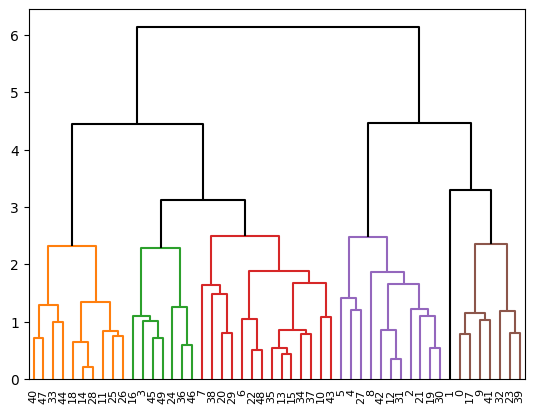

In [126]:
link = linkage(df_stand, method='complete')
dendrogram(link, color_threshold=3, above_threshold_color='black');

In [127]:
labels2 = cut_tree(link, n_clusters=3).T

In [128]:
np.sum(np.where(labels[0] != labels2[0]))

536

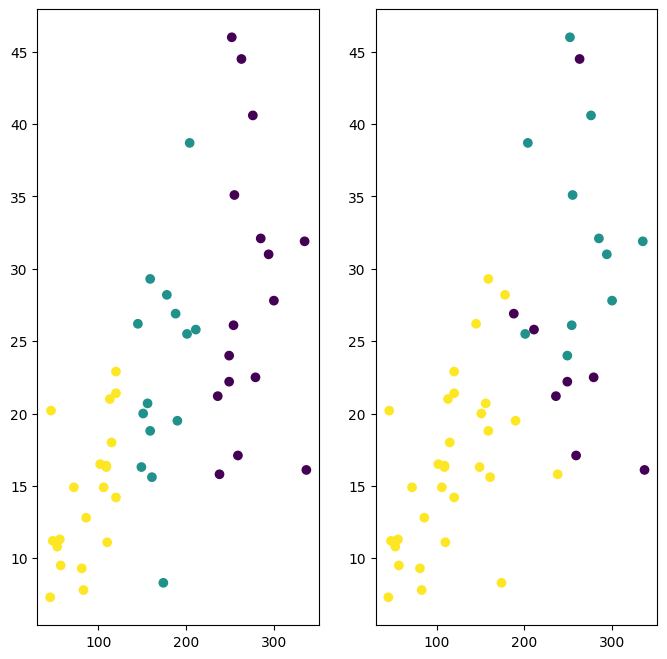

In [129]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].scatter(df['Assault'], df['Rape'], c=labels)
axes[1].scatter(df['Assault'], df['Rape'], c=labels2)